# Problem Set 6
Sophie Sun

NUMERICAL DIFFERENTIATION

In [1]:
# import packages 
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from autograd import numpy as anp
from autograd import elementwise_grad
from autograd import grad
import time

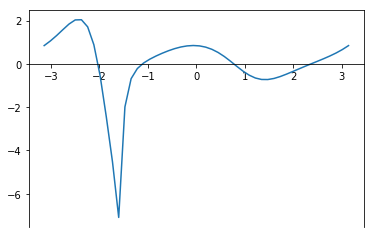

In [2]:
# EXERCISE 1
# function that differentiates a function
def differentiate(pts):
    x = sy.symbols("x")
    f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    result = sy.lambdify(x, f.diff(x), "numpy")
    return result(pts)
# plot graph
x = np.linspace(-np.pi, np.pi)
f = lambda x: (np.sin(x) + 1) ** (np.sin(np.cos(x)))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(x, differentiate(x))
plt.show()

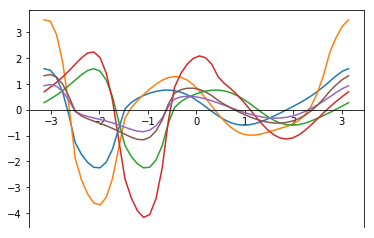

In [3]:
# EXERCISE 2
# functions for each of the finite difference quotients
def forward1(f, x, h):
    return (f(x + h) - f(x)) / h
def forward2(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)
def backward1(f, x, h):
    return (f(x) - f(x - h)) / h
def backward2(f, x, h):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)
def centered2(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)
def centered4(f, x, h):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)
# plot graph
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(x, forward1(f, x, 1))
ax.plot(x, forward2(f, x, 1))
ax.plot(x, backward1(f, x, 1))
ax.plot(x, backward2(f, x, 1))
ax.plot(x, centered2(f, x, 1))
ax.plot(x, centered4(f, x, 1))
plt.show()

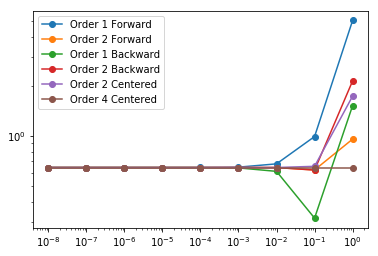

In [68]:
# EXERCISE 3
# function that gets absolute errors
def errs(f1, x_0, h, f2):
    return np.abs(differentiate(x_0) - f2(f1, x_0, h))
# plot graph
h = np.logspace(-8, 0, 9)
plt.plot(h, errs(f, 1, h, forward1), '-o', label = "Order 1 Forward")
plt.plot(h, errs(f, 1, h, forward2), '-o', label = "Order 2 Forward")
plt.plot(h, errs(f, 1, h, backward1), '-o', label = "Order 1 Backward")
plt.plot(h, errs(f, 1, h, backward2), '-o', label = "Order 2 Backward")
plt.plot(h, errs(f, 1, h, centered2), '-o', label = "Order 2 Centered")
plt.plot(h, errs(f, 1, h, centered4), '-o', label = "Order 4 Centered")
plt.loglog()
plt.legend()
plt.show()

In [5]:
# EXERCISE 4
# load data
data = np.load("plane.npy")
t, α, β = data[:, 0], data[:, 1], data[:, 2]
# convert α and β to radians
α, β = np.deg2rad(α), np.deg2rad(β)
# compute coordinates x(t) and y(t) at each t
x = 500 * np.tan(β) / (np.tan(β) - np.tan(α))
y = 500 * (np.tan(β) * np.tan(α)) / (np.tan(β) - np.tan(α))
# x′(t) and y′(t) using a fdq for t = 7, bdq for t = 14, cdq for rest
xarr, yarr = np.zeros_like(t), np.zeros_like(t)
xarr[0], yarr[0] = x[1] - x[0],  y[1] - y[0]
xarr[1:-1], yarr[1:-1] = (x[2:] - x[:-2]) / 2, (y[2:] - y[:-2]) / 2
xarr[-1], yarr[-1] = x[-1] - x[-2], y[-1] - y[-2]
# return values of speed at each t
speeds = np.sqrt(xarr ** 2 + yarr ** 2)
print(f"Speeds: {speeds}")

Speeds: [46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]


In [6]:
# EXERCISE 5
# function that approximates the Jacobian matrix using centered2
def jacobian(f, x_0, h):
    n, m = len(x_0), len(f(x_0))
    matrix = np.empty((m, n))
    for i in range(n):
        e = np.eye(n)[i]
        matrix[:, i] = (f(x_0 + h * e) - f(x_0 - h * e)) / (2 * h)
    return J

/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


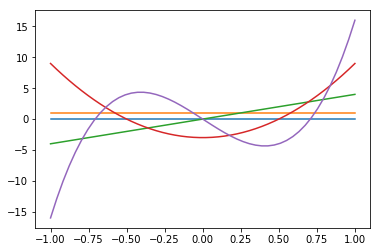

In [7]:
# EXERCISE 6
# function that recursively computes T_n(x)
def T(x, n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    return 2 * x * T(x, n - 1) - T(x, n - 2)
# plot graph
fun =  elementwise_grad(T)
x = anp.linspace(-1, 1)
for i in anp.arange(0, 5):
    plt.plot(x, fun(x, i))
plt.show()

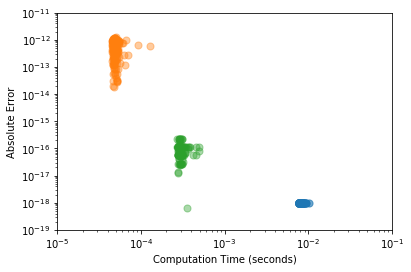

In [8]:
# EXERCISE 7
# function that performs experiment
def experiment(N):
    f = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))
    c_errs, a_errs = np.zeros(N), np.zeros(N)
    t, a_t, c_t = np.zeros(N), np.zeros(N), np.zeros(N)
    for i in range(N):
        x_0 = np.random.rand()
        start = time.time()
        result = differentiate(x_0)
        t[i] =  time.time() - start
        c_start = time.time()
        c_errs[i] = np.abs(centered4(f, x_0, 1e-3) - result)
        c_t[i] =  time.time() - c_start
        fun = grad(f)
        a_start = time.time()
        a_errs[i] = np.abs(fun(x_0) - result)
        a_t[i] = time.time() - a_start  
    plt.scatter(t, 1e-18 * np.ones(N), alpha = 0.4, s = 50)
    plt.scatter(c_t, c_errs, alpha = 0.4, s = 50)
    plt.scatter(a_t, a_errs, alpha = 0.4, s = 50)
    plt.loglog()
    plt.xlim(1e-5, 1e-1)
    plt.ylim(1e-19, 1e-11)
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.show()
experiment(200)

NUMERICAL INTEGRATION

In [9]:
# import packages, in addition to ones already imported
from scipy.stats import norm
from scipy.optimize import root
from scipy.integrate import quad

In [10]:
# EXERCISE 1
# function that integrates on a function given a method
def integrate(f, a, b, N, method):
    i = np.arange(0, N)
    x = a + ((2 * i + 1) * (b - a)) / (2 * N)
    if method == "midpoint":
        return ((b - a) / N) * np.sum(f(x))
    if method == "trapezoid":
        return (b - a) / (2 * N) * (f(x[0]) + 2 * np.sum(f(x[1:-1])) + f(x[-1]))
    if method == "Simpson":
        i = np.arange(0, 2 * N)
        x = a + (i * (b - a)) / (2 * N)
        return ((b - a) / (6 * (N + 1))) * (f(x[0]) + 4 * np.sum(f(x[1:(2 * N - 1):2])) + 2 * np.sum(f(x[2:(2 * N - 2):2])) + f(x[-1]))
f = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
# calculate integrals and find difference
mid = integrate(f, -10, 10, 500, "midpoint")
m_diff = abs(4373.33333333 - mid)
trap = integrate(f, -10, 10, 500, "trapezoid")
t_diff = abs(4373.33333333 - trap)
Sim = integrate(f, -10, 10, 500, "Simpson")
S_diff = abs(4373.33333333 - Sim)
print(f"Midpoint: {mid}, Difference: {m_diff}\nTrapezoid: {trap}, Difference: {t_diff}\nSimpson: {Sim}, Difference: {S_diff}")

Midpoint: 4373.278586816, Difference: 0.05474651399981667
Trapezoid: 4331.446099615359, Difference: 41.88723371464039
Simpson: 4381.574824044178, Difference: 8.241490714178326


In [11]:
# EXERCISE 2
# function that makes a Newton-Cotes discrete approximation
def nc_approx(μ, σ, N, k):
    dist = norm(loc = μ, scale = σ)
    w = np.zeros(N)
    z = np.linspace(μ - k * σ, μ + k * σ, N)
    w[0] = dist.cdf((z[0] + z[1]) / 2)
    for i in range(1, N - 1):
        z_min = (z[i - 1] + z[i]) / 2
        z_max = (z[i] + z[i + 1]) / 2
        w[i] = dist.cdf(z_max) - dist.cdf(z_min)
    w[-1] = 1 - dist.cdf(z[-2] + z[-1])
    return w, z
w, z = nc_approx(0, 1, 11, 1)
print(f"Weights: {w}\nNodes: {z}")

Weights: [0.18406013 0.05790353 0.06657389 0.07355104 0.07808358 0.07965567
 0.07808358 0.07355104 0.06657389 0.05790353 0.03593032]
Nodes: [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


In [12]:
# EXERCISE 3
# function that makes a lognormal discrete approximation
def ln_approx(μ, σ, N, k):
    w, z = nc_approx(μ, σ, N, k)
    return w, np.exp(z)

In [13]:
# EXERCISE 4
# function that approximates the expected value of income
def approx():
    w, z = ln_approx(10.5, 0.8, 11, 1)
    approx = np.sum(w * z)
    exact = np.exp(10.5 + 0.8 ** 2 / 2)
    diff = abs(approx - exact)
    print(f"Approximation: {approx}, Exact: {exact}, Difference: {diff}")
approx()

Approximation: 27757.97176730109, Exact: 50011.087008521754, Difference: 22253.115241220665


In [14]:
# EXERCISE 5
# function that approximates the integral using the Gaussian quadrature
def gauss_quad(params, a, b):
    w, x, n = params[:3], params[3:], len(params)
    approx = np.empty(n)
    for i in range(1, n + 1):
        approx[i - 1] = ((b ** i - a ** i) / i) - w @ x ** (i - 1)
    return approx
params = root(gauss_quad, x0 = np.ones(6), args = (-10, 10)).x
weights, nodes = params[:3], params[3:]
approx = np.sum(weights * f(nodes))
diff = abs(4373.3333333 - approx)
print(f"Approximation: {approx}, Difference: {diff}")

Approximation: 4373.333333340381, Difference: 4.038065526401624e-08


In [15]:
# EXERCISE 6
approx, x = quad(f, -10, 10)
diff = abs(4373.333333 - approx)
print(f"Approximation: {approx}, Difference: {diff}")

Approximation: 4373.333333333334, Difference: 3.3333435567328706e-07


In [17]:
# EXERCISE 7
# function that uses Monte Carlo Integration to approximate pi
def monte_carlo(f, xmin, xmax , N):
    draws = np.random.uniform(xmin, xmax, size = (N, 2))
    return 4 * (1 / N) * np.sum(g(draws[:, 0], draws[:, 1]))
# function that determines if the draw is in the circle
def fun(x, y):
    return x ** 2 + y ** 2 <= 1
# find smallest number of draws that matches π to the 4th decimal
tol, diff = 1e-5, 1e3
N = 1
while diff > tol:
    π = monte_carlo(fun, -1, 1, N)
    diff = np.abs(π - 3.1415)
    N += 1
print(f"Smallest N: {N}, Pi: {π}")

Smallest N: 5676, Pi: 3.1414977973568283


In [ ]:
# EXERCISE 8
# function that finds prime numbers
def prime(N):
    p  = []
    n = 2
    while len(p) < N:
        ptest  = [n for i in p if n % i == 0]
        p += [] if ptest else [n]
        n += 1
    return p
# function that finds the different sequences
def weyl(n, d):
    p = prime(d)
    o = np.outer(np.arange(1, n + 1, 1), np.sqrt(p))
    return o - np.floor(o)
def haber(n, d):
    p = prime(d)
    N = np.arange(1, n + 1, 1)
    o = np.outer((N * (N + 1)) / 2, np.sqrt(p))
    return o - np.floor(o)
def niederreiter(n, d):
    s = np.arange(1, d + 1, 1)
    N = np.arange(1, n + 1, 1)
    powers = np.outer((1 / (N + 1)), s)
    o = n.reshape(n, 1) * 2 ** powers
    return o - np.floor(o)

In [ ]:
# EXERCISE 9
# function that uses quasi-Monte Carlo Integration to approximate pi
def q_monte_carlo(f, xmin, xmax, N):
    draws = 2 * haber(N, 2) - 1
    return 4 * (1 / N) * np.sum(f(draws[:, 0], draws[:, 1]))
q_monte_carlo(fun, -1, 1, 10000)

SIMPLEX METHOD

In [24]:
# EXERCISE 1-6
# class that solves a linear optimization problem using Simplex
class SimplexSolver:
    def __init__(self, c, A, b):
        self.c, self.A, self.b = np.array(c), np.array(A), np.array(b)
        if np.any(self.b < 0):
            raise ValueError("Problem is not feasible")
        self.m, self.n = self.A.shape
        i = self.m + self.n
        # store and track all basic and non-basic variables
        self.L = np.concatenate([np.arange(self.n, i, 1), np.arange(0, self.n, 1)])
        self.T = self.tableau()
    # method that creates the initial tableau as NumPy array
    def tableau(self):
        identity = np.eye(self.m)
        A_bar = np.hstack([self.A, identity])
        c_bar = np.hstack([self.c, np.zeros(self.m)])
        T1 = np.hstack([0, -c_bar.T, 1])
        T2 = np.column_stack([self.b, A_bar, np.zeros(self.m)])
        return np.vstack([T1, T2])
    # method that tracks the row and column numbers
    def pivot_id(self):
        T = self.T.copy()
        col = int(np.argwhere(T[0, 1:] < 0)[0]) + 1
        if np.all(T[:, col] <= 0):
            raise ValueError("Problem is unbounded")
        neg = T[:, col] <= 0
        T[neg, col] = np.nan
        row = np.nanargmin(T[:, 0] / T[:, col])
        return row, col
    # method that determines the pivot row and column according to Bland
    def pivot(self):
        L, T, m = self.L, self.T, self.m
        row, col = self.pivot_id()
        L_temp = L.copy()
        L[row - 1] = L_temp[col + m - 1]
        L[col + m - 1] = L_temp[row - 1]     
        T[row, :] /= T[row, col]
        for i in range(T.shape[0]):
            if i == row:
                pass
            else:
                k = -T[i, col]
                T[i, :] += k * T[row, :]
        self.T = T
        self.L = L
    # method that obtains the optimal solution
    def solve(self):
        while np.any(self.T[0, :] < 0):
            self.pivot()       
        max_value = self.T[0, 0]
        basic = self.L[:self.m]
        nonbasic = self.L[self.m:]
        d1 = dict(zip(nonbasic, np.zeros(self.m)))
        d2 = dict(zip(basic, self.T[1:, 0]))
        return (max_value, d1, d2)
c = [3., 2]
A = [[1., -1], 
     [3, 1],
     [4, 3]]
b = [2., 5, 7]
sol = SimplexSolver(c, A, b).solve()
print(sol)

(5.2, {3: 0.0, 4: 0.0}, {2: 0.5999999999999996, 0: 1.6, 1: 0.19999999999999982})


In [26]:
# EXERCISE 7
# function that solves the product mix problem
def solve_product_mix():
    data = np.load("productMix.npz")
    a = data["A"]
    p = data["p"]
    m = data["m"]
    d = data["d"]
    A = np.row_stack([a, np.eye((4))])
    b = np.concatenate([m, d])
    sol = SimplexSolver(p, A, b).solve()
    print(sol)
solve_product_mix()

(7453.596491228071, {7: 0.0, 4: 0.0, 9: 0.0, 5: 0.0}, {1: 6.192982456140348, 3: 1.7894736842105292, 6: 0.9659649122807016, 0: 10.0, 8: 13.807017543859653, 2: 12.0, 10: 8.21052631578947})


ITERATIVE SOLVERS

In [45]:
# import packages, in addition to ones already imported
from scipy.linalg import norm
from scipy import sparse

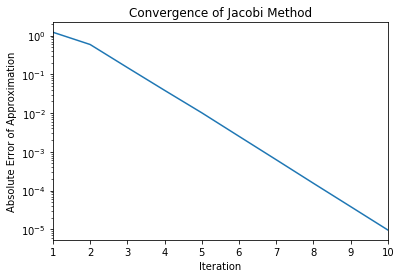

True

In [41]:
# EXERCISE 1-2
def jacobi(A, b, tol, maxiter, plot=False):
    err, i = 1e3, 0    
    D, L, U, x = np.diag(A), np.tril(A), np.triu(A), np.ones_like(b)
    errs = np.empty(maxiter)
    while err > tol and i < maxiter:
        x1 = x + (b - A @ x) / D
        errs[i] = norm(x1 - x, np.inf)
        err = errs[i]
        i += 1
        x = x1
    if plot:
        plt.plot(range(1, i + 1), errs[:i])
        plt.semilogy()
        plt.xlim(1, i)
        plt.title("Convergence of Jacobi Method")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.show()
    return x
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A
n = 5000
A = diag_dom(n)
b = np.random.random(n)
opt = jacobi(A, b, 1e-5, 100, plot = True)
np.allclose(A @ opt, b, atol = 1e-3)

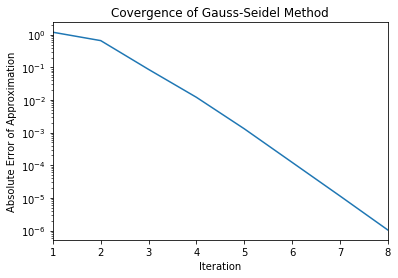

True

In [46]:
# EXERCISE 3
# function that implements the Gauss-Seidel method
def gauss_seidel(A, b, tol, maxiter, plot = False):
    err, i = 1e3, 0
    x = np.ones_like(b)  # Initial gues
    x1 = x.copy()
    errs = np.empty(maxiter)
    while err > tol and i < maxiter:
        for n in range(len(x)):
            x1[n] = x1[n] + (1 / A[n, n]) * (b[n] - A[n, :].T @ x1)  
        errs[i] = norm(x1 - x, np.inf)
        err = errs[i]
        i += 1
        x = x1.copy()
    if plot:
        plt.plot(range(1, i + 1), errs[:i])
        plt.semilogy()
        plt.xlim(1, i)
        plt.title("Covergence of Gauss-Seidel Method")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.show()
    return x
opt = gauss_seidel(A, b, 1e-5, 100, plot = True)
np.allclose(A @ opt, b, atol = 1e-3)

In [65]:
# EXERCISE 4
# function that implements the Gauss-Seidel method and accepts a sparse matrix
def gauss_seidel_sparse(A, b, tol, maxiter):
    err, i = 1e3, 0 
    x = np.ones_like(b)
    x1 = x.copy()
    errs = np.empty(maxiter)
    while err > tol and i < maxiter:
        for n in range(len(x)):
            start, end = A.indptr[n], A.indptr[n+1]
            Aix = A.data[start:end] @ x[A.indices[start:end]]
            x1[n] = x1[n] + (1 / A[n, n]) * (b[n] - Aix)  
        errs[i] = norm(x1 - x, np.inf)
        err = errs[i]
        i += 1
        x = x1.copy()
    if i < maxiter:
        print(f"Converged in {i} iterations")
    else:
        print("Didn't converge")
    return x
A_sparse = sparse.csr_matrix(diag_dom(500))
b_sparse = np.random.random(500)
x_opt = gauss_seidel_sparse(A_sparse, b_sparse, 1e-5, 100)
np.allclose(A_sparse @ x_opt, b_sparse)

Converged in 11 iterations


False

In [72]:
# EXERCISE 5
# function that implements the SOR method
def SOR(A, b, ω, tol, maxiter, plot = False, print_flag = True):
    err, i = 1e3, 0
    x = np.ones_like(b)
    x1 = x.copy()
    errs = np.empty(maxiter)
    while err > tol and i < maxiter:
        for n in range(len(x)):
            x1[n] = x1[n] + (ω / A[n, n]) * (b[n] - A[n, :].T @ x1)  
        errs[i] = norm(x1 - x, np.inf)
        err = errs[i]
        i += 1
        x = x1.copy()
    if print_flag:
        if i < maxiter:
            print(f"Converged in {i} iterations")
        else:
            print("Didn't converge")
        
    return x, i, i < maxiter
print(SOR(A, b, 1.3, 1e-5, 100))

Converged in 16 iterations
(array([0.00284507, 0.00542643, 0.00833696, ..., 0.00395815, 0.00626572,
       0.00710038]), 16, True)


Converged in 12 iterations


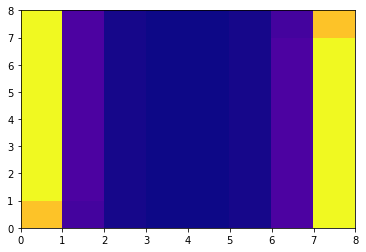

(array([[12.70167301,  1.61338412,  0.20539991,  0.02981513,  0.03312114,
          0.23515396,  1.84811052, 14.5497302 ],
        [14.54973106,  1.84811826,  0.23521505,  0.03360215,  0.03360215,
          0.23521505,  1.84811828, 14.54973118],
        [14.54973118,  1.84811828,  0.23521505,  0.03360215,  0.03360215,
          0.23521505,  1.84811828, 14.54973118],
        [14.54973118,  1.84811828,  0.23521505,  0.03360215,  0.03360215,
          0.23521505,  1.84811828, 14.54973118],
        [14.54973118,  1.84811828,  0.23521505,  0.03360215,  0.03360215,
          0.23521505,  1.84811828, 14.54973118],
        [14.54973118,  1.84811828,  0.23521505,  0.03360215,  0.03360215,
          0.23521505,  1.84811828, 14.54973118],
        [14.54973118,  1.84811828,  0.23521505,  0.03360215,  0.03360215,
          0.23521505,  1.84811826, 14.54973106],
        [14.5497302 ,  1.84811052,  0.23515396,  0.03312114,  0.02981513,
          0.20539991,  1.61338412, 12.70167301]]), 12, True)

In [77]:
# EXERCISE 6
# function that implements the Laplace equation
def laplace(n, ω, tol, maxiter, plot=False, print_flag=True):
    A = -n * np.eye(n ** 2) + np.eye(n ** 2, k = 1) + np.eye(n ** 2, k = -1)
    b = np.zeros(n)
    b[0], b[-1] = -100, -100
    b = np.tile(b, n)
    u, i, c = SOR(A, b, ω, tol, maxiter, False, print_flag)
    u = u.reshape(n, n)
    if plot:
        plt.pcolormesh(u, cmap = "plasma")
        plt.show()  
    return u, i, c
laplace(8, 1, 1e-8, 100, plot = True)

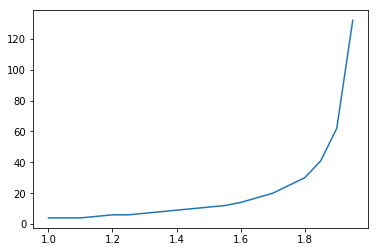

In [82]:
# EXERCISE 7
# function that plots the number of computed iterations as a function of ω
def plot():
    x = np.linspace(1, 1.95, 20)
    n_iterations = np.nan * np.ones_like(x)
    n = 20

    for i, ω in enumerate(x):
        result = laplace(n, ω, 1e-2, 1000, print_flag=False)
        if result[2]:
            n_iterations[i] = result[1]
    plt.plot(x, n_iterations)
    plt.show()
plot()

NEWTON'S METHOD

In [87]:
# import packages, in addition to ones already imported
from scipy.optimize import newton

In [92]:
# EXERCISE 1
# function that implements Newton’s method
def newt(f, f1, x_0, tol, maxiter):
    i = 0
    diff = 1e3
    x = x_0
    while diff > tol and i < maxiter:
        x1 = x - f(x) / f1(x)
        diff = np.abs(x1 - x)
        x = x1
        i += 1
    if i < maxiter:
        print(f"Converged in {i} iterations")
    else:
        print("Didn't converge")
    return x, i < maxiter, i
f = lambda x: np.exp(x) - 2
f1 = lambda x: np.exp(x)
print(newt(f, f1, 1, 1e-5, 15))
print(f(newt(f, f1, 1, 1e-5, 15)[0]))
g = lambda x: x ** 4 - 3
g1 = lambda x: 4 * x ** 3
print(newt(g, g1, 1, 1e-5, 15))
print(newton(g, 1, g1))

Converged in 4 iterations
(0.6931471805600254, True, 4)
Converged in 4 iterations
1.603162047558726e-13
Converged in 5 iterations
(1.3160740129543826, True, 5)
1.3160740129524924


In [94]:
# EXERCISE 2
# function that uses Newton's method to determine r
def newt_r(N1, N2, P1, P2):
    f = lambda r: P1 * ((1 + r)**N1 - 1) - P2 * (1 - (1 + r)**(-N2))
    f1 = lambda r: P1 * N1 * (1 + r)**(N1 - 1) - P2 * N2 * (1 + r)**(-N2 - 1)
    return newt(f, f1, 1, 1e-5, 50)
newt_r(30, 20, 2000, 8000)

Converged in 24 iterations


(0.03877843204285935, True, 24)

In [98]:
# EXERCISE 3
# function that modifies the first Newton function
def m_newt(f, f_prime, x_0, α, tol, maxiter, print_flag = True):
    diff, i, x = 1e3, 0, x_0
    while diff > tol and i < maxiter:
        x1 = x - α * f(x) / f1(x)
        diff = np.abs(x1 - x)
        x = x1
        i += 1
    if print_flag:
        if i < maxiter:
            print(f"Converged in {i} iterations")
        else:
            print("Didn't converge")
    return x, i < maxiter, i
f = lambda x: np.sign(x) * np.power(np.abs(x), 1/3)
f1 = lambda x: 1 / 3 * np.power(np.abs(x), -2/3)
m_newt(f, f1, 0.01, 1, 1e-5, 50)
m_newt(f, f1, 0.01, 0.4, 1e-5, 50)

Didn't converge
Converged in 6 iterations


(6.400000000000134e-07, True, 6)

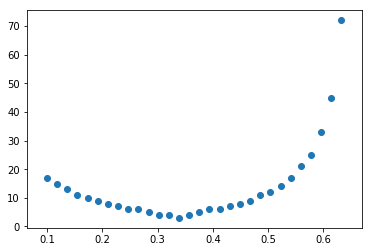

In [102]:
# EXERCISE 4
# function that uses Newton’s method to find a zero of f using various values of α in the interval (0,1] and plots
def newt():
    n = 50
    α_grid, pts = np.linspace(1e-1, 1, n), np.zeros((n, 2))
    for i, α in enumerate(α_grid):
        result = m_newt(f, f_prime, 0.01, α, 1e-5, 100, print_flag = False)
        if result[1]:
            pts[i, :] = (α, result[2])
        else:
            pts[i, :] = np.nan * np.ones(2)
    plt.scatter(pts[:, 0], pts[:, 1])
    plt.show()
newt()

In [108]:
# EXERCISE 5
# function that modifies previous functions to compute a zero of a function
def m_newt2(f, f1, x_0, α, tol, maxiter, print_flag = True):
    diff, i, x = 1e3, 0, x_0
    if np.isscalar(x_0):
        while diff > tol and i < maxiter:
            x1 = x - α * f(x) / f1(x)
            diff = np.abs(x1 - x)
            x = x1
            i += 1
    else:
        while diff > tol and i < maxiter:
            y = np.linalg.solve(f1(x), f(x))
            x1 = x - α * y
            diff = norm(x1 - x, np.inf)
            x = x1
            i += 1
    if print_flag:
        if i < maxiter:
            print(f"Converged in {i} iterations")
        else:
            print("Didn't converge")
    return x, i < maxiter, i
print(m_newt2(f, f1, 1, 0.4, 1e-5, 15))
# function that finds r
def r(N1, N2, P1, P2):
    f = lambda r: P1 * ((1 + r)**N1 - 1) - P2 * (1 - (1 + r)**(-N2))
    f_prime = lambda r: P1 * N1 * (1 + r)**(N1 - 1) - P2 * N2 * (1 + r)**(-N2 - 1)
    return m_newt2(f, f1, 1, 1, 1e-5, 50)
r(30, 20, 2000, 8000)
def f(x_vec):
    x, y = x_vec
    return np.array([x ** 2, x ** 3 - y])
def Df(x_vec):
    x, y = x_vec
    return np.array([[2 * x , 0], [3 * x ** 2, -1]])
m_newt2(f, Df, [1.5, 1.5], 0.5, 1e-5, 100)

Converged in 9 iterations
(-5.120000000000109e-07, True, 9)
Converged in 3 iterations
Converged in 38 iterations


/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


(array([ 2.68175604e-05, -3.37714855e-11]), True, 38)

In [113]:
# EXERCISE 6
# set parameters
γ = 5
δ = 1
def h(vec):
    x, y = vec
    return np.array([γ * x * y - x * (1 + y), -x * y + (δ - y) * (1 + y)])
def Dh(vec):
    x, y = vec
    return np.array([[γ * y - (1 + y), γ * x - x], [-y, -x + δ - 1 - 2 * y]])
def init_point(α, c1, c2 = None):
    for x in np.linspace(-1/4, 0):
        for y in np.linspace(0, 1/4):
            result = m_newt2(h, Dh, [x, y], α, 1e-5, 100, print_flag=False)
            if c2 is None:
                if np.allclose(result[0], c1):
                    return np.array([x, y])
            else:
                if np.allclose(result[0], c1) or np.allclose(result[0], c2):
                    return np.array([x, y])
xvec = init_point(0.55, [3.75, 0.25])
xvec
m_newt2(h, Dh, xvec, 0.55, 1e-5, 100)
xvec2 = init_point(1, [0, -1], [0, 1])
xvec2
m_newt2(h, Dh, xvec2, 1, 1e-5, 100)

Converged in 18 iterations
Converged in 7 iterations


(array([-1.39269534e-16, -1.00000000e+00]), True, 7)

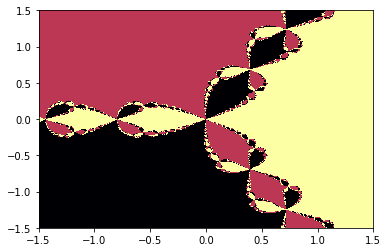

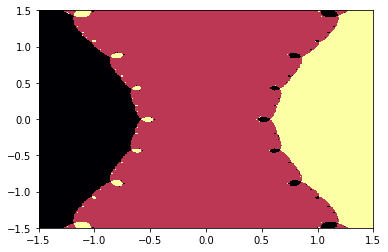

In [119]:
# EXERCISE 7
def basins(f, f1, zeros, rmin, rmax, imin, imax, res, iters, tol=1e-5):
    x_real = np.linspace(rmin, rmax, res)
    x_imag = np.linspace(imin, imax, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j * X_imag
    diff, i = 1e3, 0
    while diff > tol and i < iters:
        X1 = X_0 - f(X_0) / f1(X_0)
        diff = norm(X1 - X_0)
        X_0 = X1
        i += 1
    Y = np.zeros_like(X_0, dtype = int)
    diffs = 1e3 * np.ones_like(X_0, dtype = int)  
    for r_id, R in enumerate(zeros):
        diffs_new = np.abs(X_0 - R)
        Y[diffs_new < diffs] = r_id
        diffs = diffs_new
    plt.pcolormesh(X_real, X_imag, Y, cmap = "inferno")
    plt.show()
f = lambda x: x ** 3 - 1
f1= lambda x: 3 * x ** 2
zeros = np.array([-1/2 - np.sqrt(3) / 2 * 1j, -1/2 + np.sqrt(3) / 2 * 1j, 1])
basins(f, f1, zeros, -1.5, 1.5, -1.5, 1.5, 500, 50)
g = lambda x: x ** 3 - x
g1 = lambda x: 3 * x ** 2 - 1
zeros = np.array([-1, 0, 1])
basins(g, g1, zeros, -1.5, 1.5, -1.5, 1.5, 500, 50)